In [1]:
from astropy.table import Table, Column
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def calc_ses_epoch(sesname):
    """Calculate the epoch from a single session.

    Parameter
    ---------
    sesname : str
        session name (8-letters)

    Return
    ------
    epoch.jyear : float
        Epoch of session in Julian year
    """

    # Mapping table between letter and number for month
    monstr2num = {
        "JAN": "01",
        "FEB": "02",
        "MAR": "03",
        "APR": "04",
        "MAY": "05",
        "JUN": "06",
        "JUL": "07",
        "AUG": "08",
        "SEP": "09",
        "OCT": "10",
        "NOV": "11",
        "DEC": "12"
    }

    year = int(sesname[1:3])
    monstr = sesname[3:6]
    date = sesname[6:8]

    if year >= 79:
        year += 1900
    else:
        year += 2000

    epoch = Time("{}-{}-{}".format(year, monstr2num[monstr], date), format="iso")

    return epoch.jyear

In [19]:
arc_list = Table.read("../data/opa2019a.arc", format="ascii.fixed_width_no_header",
                     col_starts=[2, 0], col_ends=[12, 100], names=["db_name", "all"])

epoch = [calc_ses_epoch(db_name) for db_name in arc_list["db_name"]]
epoch = Column(epoch, name="epoch")

arc_list.add_column(epoch)

In [20]:
arc_list

db_name,all,epoch
str10,str79,float64
$79AUG03XX,$79AUG03XX 27 ! X-US XUS79C HsG3Oo,1979.5852156057495
$79NOV25X,$79NOV25X 50 ! XATL XATL79 EbGbOoHs,1979.8973305954826
$80APR11XQ,$80APR11XQ 48 ! X-US XUS801 HrOoHsGb,1980.2751540041068
$80JUL26X,$80JUL26X 46 ! MERIT-1 MERT01 HrOoHsEbOn,1980.5653661875428
$80JUL27X,$80JUL27X 46 ! MERIT-2 MERT02 HsHrEbOoOn,1980.56810403833
$80SEP26X,$80SEP26X 36 ! MERIT-4 MERT04 EbOoHrHsOn,1980.7351129363449
$80SEP27X,$80SEP27X 35 ! MERIT-5 MERT05 HrEbOoHsOn,1980.7378507871322
$80SEP28X,$80SEP28X 35 ! MERIT-6 MERT06 HsOoHrEbOn,1980.7405886379192
$80SEP29X,$80SEP29X 39 ! MERIT-7 MERT07 HsHrOoOn,1980.7433264887063


The statistics of the number of sessions in each years are
Min      2.0
Max      283.0
Mean     165.1219512195122
Median:  168.0


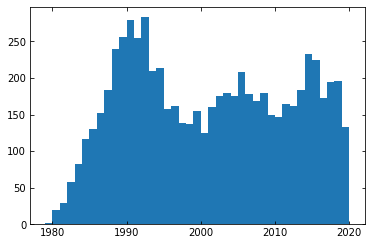

In [17]:
bins = np.arange(1979, 2021, 1)

coun, step, _ = plt.hist(arc_list["epoch"], bins)

print("The statistics of the number of sessions in each years are")
print("Min     ", np.min(coun))
print("Max     ", np.max(coun))
print("Mean    ", np.mean(coun))
print("Median: ", np.median(coun))

In [18]:
coun

array([  2.,  20.,  29.,  58.,  83., 116., 130., 152., 184., 239., 256.,
       279., 255., 283., 209., 213., 157., 162., 139., 137., 155., 125.,
       160., 176., 180., 176., 208., 178., 168., 180., 150., 147., 164.,
       161., 184., 233., 225., 173., 195., 196., 133.])

Consider the few sessions in the first several years at the beginning, I start with 1985.

### Type 1 Separate sessions made in each year and make yearly solutions, namely yearly.

In [26]:
mask = (arc_list["epoch"] < 1985)
tabsub = arc_list[mask]
tabsub.write("../data/yearly/{:d}-y.arc".format(1985), 
             format="ascii.fixed_width_no_header",
             formats={"all": "%-100s"},
             include_names=["all"], delimiter=" ",
             overwrite=True)

for year in range(1985, 2020):
    mask = (arc_list["epoch"] > year) & (arc_list["epoch"] < year+1)
    tabsub = arc_list[mask]
    tabsub.write("../data/yearly/{:d}-y.arc".format(year), 
             format="ascii.fixed_width_no_header",
             formats={"all": "%-100s"},
             include_names=["all"], delimiter=" ",
             overwrite=True)

### Type 2 Use all the sessions made until a certain year, namely continued.

In [27]:
for year in range(1985, 2020):
    mask = (arc_list["epoch"] < year)
    tabsub = arc_list[mask]
    tabsub.write("../data/continued/{:d}-c.arc".format(year), 
             format="ascii.fixed_width_no_header",
             formats={"all": "%-100s"},
             include_names=["all"], delimiter=" ",
             overwrite=True)